In [2]:
from konlpy.tag import Okt
import nltk
from collections import Counter
import pandas as pd#pandas import
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from math import log

In [3]:
def clean_text(text):
    cleaned_text = re.sub('[a-zA-z]','',text)
    cleaned_text = re.sub('[0-9]','',cleaned_text)
    cleaned_text = re.sub('[\u3000※∼\ufeff‘’°“”🤗\u200b\n\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"\♥\♡\ㅋ\ㅠ\ㅜ\ㄱ\ㅎ\ㄲ\ㅡ]','',cleaned_text)
    return cleaned_text

In [4]:
file = open("크롤링2.csv", mode='r', encoding='utf-8')
text = file.read()

In [5]:
text=clean_text(text)

In [6]:
okt = Okt()
noun = okt.nouns(text)
noun = [n for n in noun if len(n)>1]
count = Counter(noun)

In [7]:
remove_onechar_over4 = Counter({x : count[x] for x in count if len(x) > 1 and count[x]>=5})
print(remove_onechar_over4)

Counter({'학교': 1191, '스마트': 535, '그린': 484, '학부모': 379, '미래': 357, '사업': 324, '반대': 279, '아이': 244, '혁신': 188, '교육청': 177, '교육': 173, '철회': 158, '초등학교': 139, '선정': 120, '의견': 109, '학생': 107, '지정': 105, '서울': 101, '수업': 100, '개축': 100, '교실': 99, '생각': 98, '진행': 91, '서울시': 90, '문제': 86, '지역': 85, '우리': 82, '모델링': 82, '서명': 80, '추진': 77, '시설': 76, '모듈러': 76, '대상': 74, '내용': 74, '공감': 74, '건물': 73, '공사': 72, '주민': 71, '여의도': 71, '정책': 70, '공간': 68, '안전': 65, '교육부': 65, '노후': 60, '부모님': 60, '학습': 59, '운영': 56, '대한': 55, '카페': 55, '이유': 52, '동의': 51, '참여': 51, '이상': 51, '컨테이너': 49, '설명': 49, '대해': 48, '관련': 48, '요청': 47, '환경': 47, '교장': 47, '개교': 47, '지금': 46, '위해': 46, '경우': 44, '동안': 43, '상황': 41, '다시': 41, '예정': 41, '요구': 40, '중학교': 40, '현재': 39, '설치': 39, '예산': 39, '전학': 38, '때문': 37, '계획': 37, '강남': 37, '교육감': 37, '코로나': 37, '우려': 36, '기간': 35, '시작': 35, '운동장': 35, '교사': 35, '신청': 34, '목동': 34, '답글': 34, '민원': 33, '다른': 33, '화환': 33, '수렴': 32, '주장': 32, '조희연': 32, '검토': 32, '선생님': 31, '

In [8]:
stopwords4= '서울 서울시 부모 학부모 학부 용산 아이 사업 교육청 초등학교 개축 교육부 부모님 경우 교육감 답글 민원 화환 기자 공문 찬성 모두 일부 저희 국민 용강 의원 기사 안건 지원 입장 도성 중대 전국 개인 학운 전달 로그인 교문 복사 기업 의사 전국구 구청 중앙 정문 조화 신문 수도 청와대 첨부파일 스팸 귀하 현수막 계시 회장 조직 교가 시장 대교 증시 오류 관광 도움말 조원 회사 카카오 조억원 임대 교의 소개 유튜브 한국판 송림 경향신문 삼성 주무관 검색 개월집회 당국 사이트 그린 스마트 학교 미래 톡방 아시 얘기 오픈 채팅 주말 누가 특보 일보 선택 리본 자필 기도 보기 태양광 링크 가운데 보고 여의 이름 첨부 사진 제출 안내 대한민국 네이버 카페 양식 파일 다운로드 사용 국민신문고 연락 회원 입력 번호 인증 입구 신분 제일 챗방 결사 자기 이해 행정 선거 광고 자동 기초 코드 주소 아주 상태 경원 제목 통화 공유 집단 행동 단위 시위 내용 중이 소식 올해 등장 가요 최소 플러스 미래학 대표 가야 디지털 박스 산업 위원 개학 자리 블로그 친환경 삭제 출처 사업인 시내 가치 경찰 구역 청장 상승 어른 세대 라면 관계 무릎 기자회견 정신 유발 교직원 양보 모스 홍보 가상 콘텐츠 공모전 접수 홈페이지공모 표현 출품 일반 이미지 사전 서도 저장 브레드 강퇴 현대 부지 경과 문구 자신 대목 상가 제공 카톡 시민단체 축구 단체 미디어 조가 에너지 기반 사용자 잡회 대통령 백신 매출 간조 토요일 일요일 평일 오전 여의도 강남 목동 조희연 송도 곡초 북초 산초 초등 잠실 안양 연희 방초 초가 이촌동 북가좌 강남구 흑석동 남초 금북초 초로 권영세 방이 신용산 초도 서초 동초 용산구 대곡 의정부 서대문구 서울특별시 한국 양천구 특구 중부교육청 대치동 종로구 영등포구 포항 흑석동 하니 때문 대해 그냥 그게 대한 만큼 무엇 관련 뭐길 얼마 어찌 진짜 거나 여기 건가 이기 라며 조금 그것 불구 또한'.split(' ')

In [9]:
remove_stopwords = Counter({x:remove_onechar_over4[x] for x in remove_onechar_over4 if x not in stopwords4})
print(remove_stopwords)

Counter({'반대': 279, '혁신': 188, '교육': 173, '철회': 158, '선정': 120, '의견': 109, '학생': 107, '지정': 105, '수업': 100, '교실': 99, '생각': 98, '진행': 91, '문제': 86, '지역': 85, '우리': 82, '모델링': 82, '서명': 80, '추진': 77, '시설': 76, '모듈러': 76, '대상': 74, '공감': 74, '건물': 73, '공사': 72, '주민': 71, '정책': 70, '공간': 68, '안전': 65, '노후': 60, '학습': 59, '운영': 56, '이유': 52, '동의': 51, '참여': 51, '이상': 51, '컨테이너': 49, '설명': 49, '요청': 47, '환경': 47, '교장': 47, '개교': 47, '지금': 46, '위해': 46, '동안': 43, '상황': 41, '다시': 41, '예정': 41, '요구': 40, '중학교': 40, '현재': 39, '설치': 39, '예산': 39, '전학': 38, '계획': 37, '코로나': 37, '우려': 36, '기간': 35, '시작': 35, '운동장': 35, '교사': 35, '신청': 34, '다른': 33, '수렴': 32, '주장': 32, '검토': 32, '선생님': 31, '학년': 29, '통해': 29, '전면': 29, '기기': 28, '사회': 28, '공부': 28, '정말': 27, '하나': 27, '적극': 27, '가장': 27, '사실': 27, '결과': 26, '누구': 26, '걱정': 26, '절차': 26, '아파트': 26, '과정': 26, '반발': 26, '뉴스': 25, '회의': 25, '투표': 25, '정보': 25, '조성': 25, '예비': 24, '관심': 24, '오늘': 24, '지난': 24, '전화': 23, '정도': 23, '바로': 23, '시간': 23, '인근

In [10]:
tags=remove_stopwords.most_common(50)

In [13]:
tags_df=pd.DataFrame(tags)
tags_df.to_csv('빈도수.csv',encoding='utf-8-sig')

In [14]:
wc = WordCloud(font_path='./ttf/gothic.ttf', background_color='white')
cloud = wc.generate_from_frequencies(dict(tags))

In [15]:
from IPython.display import set_matplotlib_formats

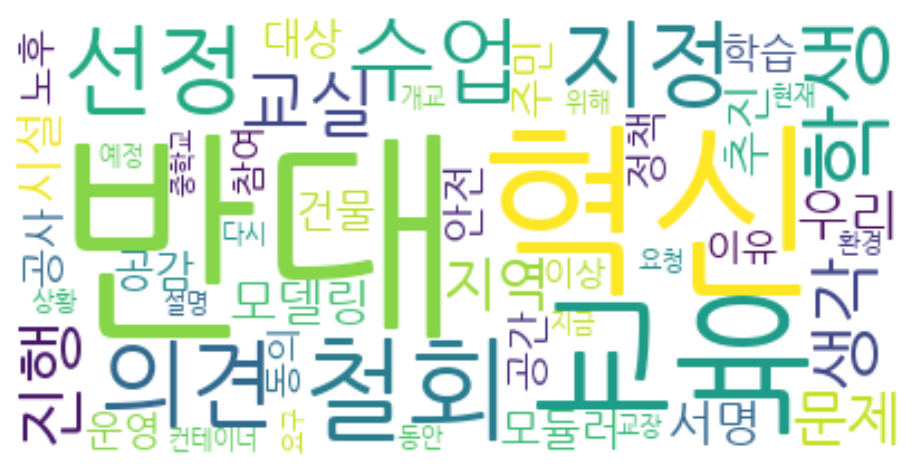

In [16]:
set_matplotlib_formats('retina')
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(cloud,interpolation="bilinear")
plt.show()

In [17]:
words_list=list(remove_stopwords.keys())

In [18]:
df1=pd.read_csv('크롤링2.csv')#저장한 값 불러오기
df2=df1.loc[:,'text']#텍스트열만 선택
i = 0
while i < 204:#텍스트 전처리
    (df2[i]) = clean_text(str(df2[i]))
    i+=1
text=list(df2)

<ipython-input-18-66d533abaf7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (df2[i]) = clean_text(str(df2[i]))


In [19]:
def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in text:
        df += t in doc
    return log(200/(df + 1))

def tfidf(t, d):
    return tf(t,d)* idf(t)

In [20]:
result = []
for i in range(200): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = text[i]
    for j in range(len(words_list)):
        t = words_list[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = words_list)
tf_

,모임,노후,건물,반대,의견,재학생,동네,주민,환영,안전,...,필요성,보완,통합,통폐합,센터,수용,의결,비판,중인,상권
0,1,1,1,2,2,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
197,0,2,2,1,1,0,0,7,0,0,...,0,0,2,10,0,0,0,0,3,5
198,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
result = []
for j in range(len(words_list)):
    t = words_list[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = words_list, columns = ["IDF"])
idf_

,IDF
모임,2.813411
노후,1.742969
건물,1.537117
반대,0.229413
의견,1.078810
...,...
수용,3.912023
의결,4.199705
비판,3.688879
중인,2.659260


In [22]:
result = []
for i in range(200):
    result.append([])
    d = text[i]
    for j in range(len(words_list)):
        t = words_list[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = words_list)
tfidf_

,모임,노후,건물,반대,의견,재학생,동네,주민,환영,안전,...,필요성,보완,통합,통폐합,센터,수용,의결,비판,중인,상권
0,2.813411,1.742969,1.537117,0.458826,2.157619,2.65926,2.302585,1.714798,3.506558,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
1,0.000000,0.000000,1.537117,0.229413,0.000000,2.65926,0.000000,0.000000,0.000000,3.321462,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.229413,0.000000,0.00000,0.000000,0.000000,0.000000,1.660731,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
3,0.000000,0.000000,1.537117,0.458826,0.000000,0.00000,2.302585,0.000000,0.000000,3.321462,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.458826,0.000000,0.00000,0.000000,5.144395,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8.440232,1.742969,1.537117,0.229413,1.078810,0.00000,0.000000,0.000000,0.000000,1.660731,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
196,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,3.688879,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000
197,0.000000,3.485939,3.074235,0.229413,1.078810,0.00000,0.000000,12.003589,0.000000,0.000000,...,0.0,0.0,7.377759,41.997051,0.0,0.0,0.0,0.0,7.97778,23.025851
198,0.000000,0.000000,0.000000,0.458826,1.078810,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,2.65926,0.000000


In [23]:
a=tfidf_.sum()

In [24]:
a=pd.DataFrame(a,columns=['score'])

In [25]:
a=a.sort_values(by=['score'], axis=0, ascending=False)
a=a.head(50)

In [26]:
value=list(a['score'])
key=list(a.index)
tag2=[]
for i in range(len(value)):
    tag2_tuple=(key[i],value[i])
    tag2.append(tag2_tuple)

In [29]:
tag2_df=pd.DataFrame(tag2)
tag2_df.to_csv('tdif가중치.csv',encoding='utf-8-sig')

In [30]:
wc2 = WordCloud(font_path='./ttf/gothic.ttf', background_color='white')
cloud2 = wc.generate_from_frequencies(dict(tag2))

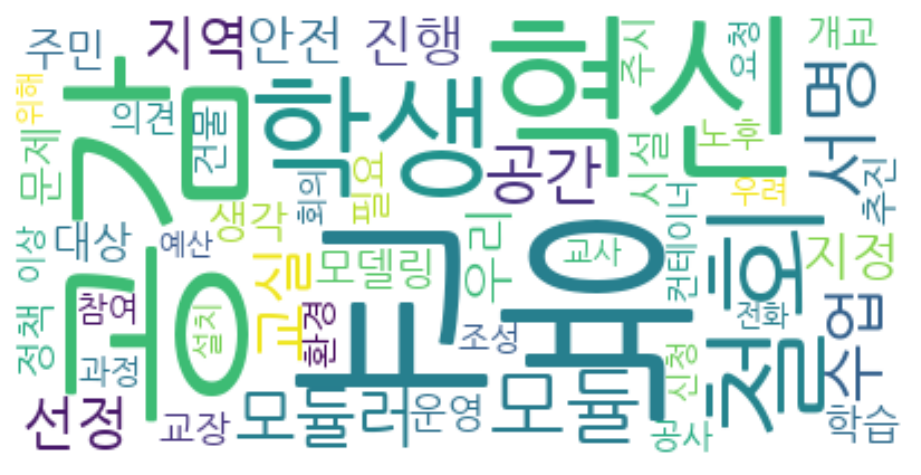

In [31]:
set_matplotlib_formats('retina')
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(cloud2,interpolation="bilinear")
plt.show()